In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
!wget -O cell_samples.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
df=pd.read_csv("cell_samples.csv")


--2021-07-13 02:17:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19975 (20K) [text/csv]
Saving to: 'cell_samples.csv'

     0K .......... .........                                  100% 2.62M=0.007s

2021-07-13 02:17:31 (2.62 MB/s) - 'cell_samples.csv' saved [19975/19975]



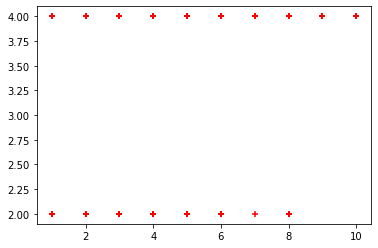

In [28]:
plt.scatter(x=df[["Clump"]],y=df['Class'],color="red",marker="+")

In [45]:
df.dtypes
# looks like BareNuc has same string values too

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [46]:
df.isnull().sum()

ID              0
Clump           0
UnifSize        0
UnifShape       0
MargAdh         0
SingEpiSize     0
BareNuc        16
BlandChrom      0
NormNucl        0
Mit             0
Class           0
dtype: int64

In [54]:
df=df.replace(to_replace="?",value=np.NaN)
df=df.dropna(axis=0,how="any")

In [63]:
cdf=df[["Clump","UnifSize","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
edf=df["Class"]
df.head()
x=np.asanyarray(cdf)
y=np.asanyarray(edf)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [68]:
from sklearn import svm
model=svm.SVC(kernel="rbf")
model.fit(x_train,y_train)
# there is no way of knowing which kernellin pattern works
y_hat=model.predict(x_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [69]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        78
           4       0.94      0.98      0.96        59

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137

Confusion matrix, without normalization
[[74  4]
 [ 1 58]]


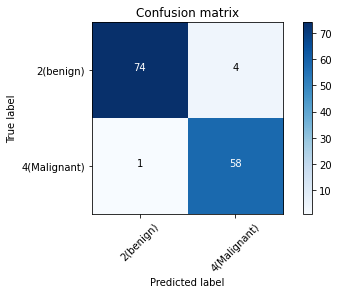

In [72]:
cm=confusion_matrix(y_test,y_hat,labels=[2,4])
print(classification_report(y_test,y_hat))
plot_confusion_matrix(cm,classes=['2(benign)','4(Malignant)'],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)

In [76]:
# f1_score
from sklearn.metrics import f1_score
f1_score(y_test,y_hat,pos_label=2)

0.9673202614379085

In [73]:
# jaccard_index
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_hat,pos_label=2)

0.9367088607594937